In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [7]:
half_data = pd.merge(transaction_data, cab_data, on='Transaction ID')
data = pd.merge(customer_data, half_data, on='Customer ID')

In [27]:
data.describe()


,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Number of Rides
count,347950.000000,347950.00000,347950.000000,3.479500e+05,347950.000000,347950.000000,347950.000000,347950.000000,347950.000000
mean,18744.122862,35.33116,15051.212091,1.022065e+07,42963.785805,22.566981,425.110021,286.468861,19.256767
std,21063.597911,12.58992,7968.379982,1.268274e+05,307.554234,12.232620,275.422956,158.102738,11.575681
min,1.000000,18.00000,2000.000000,1.000001e+07,42371.000000,1.900000,15.750000,19.000000,2.000000
25%,2620.000000,25.00000,8431.000000,1.011072e+07,42697.000000,12.000000,207.310000,151.368000,11.000000
50%,7100.000000,33.00000,14686.000000,1.022091e+07,42987.000000,22.440000,387.885000,282.555000,17.000000
75%,34873.000000,42.00000,21035.000000,1.033080e+07,43231.000000,32.960000,585.710000,414.120000,29.000000
max,60000.000000,65.00000,34996.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,54.000000


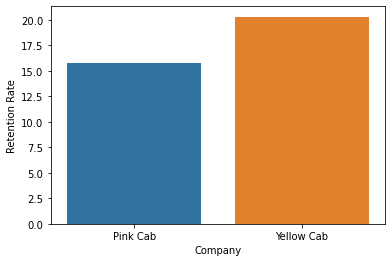

In [35]:
retention_rates = data.groupby('Company')['Number of Rides'].mean().reset_index(name='Retention Rate')
sns.barplot(x='Company', y='Retention Rate', data=retention_rates)
plt.show(

In [16]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
half_data = pd.merge(transaction_data, cab_data, on='Transaction ID')
data = pd.merge(customer_data, half_data, on='Customer ID')

In [15]:
print(data['Age group'])

0         26-35
1         26-35
2         26-35
3         26-35
4         26-35
          ...  
359387    36-50
359388    26-35
359389    36-50
359390    18-25
359391    26-35
Name: Age group, Length: 359392, dtype: category
Categories (4, object): ['18-25' < '26-35' < '36-50' < '50+']


In [14]:
age_counts = data['Age group'].value_counts().sort_index()
print(age_counts)

18-25     94153
26-35    112813
36-50     84896
50+       56684
Name: Age group, dtype: int64


<AxesSubplot:xlabel='Age group', ylabel='count'>

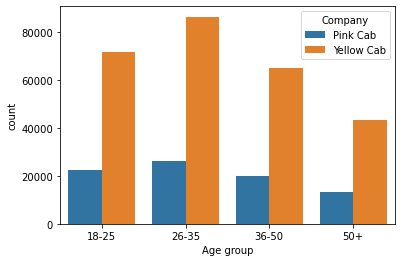

In [13]:
bin_edges = [18, 26, 36, 50, data['Age'].max()]
data['Age group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels)
sns.countplot(x='Age group', hue='Company', data=data)


In [17]:
data.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


<AxesSubplot:xlabel='Salary Range', ylabel='count'>

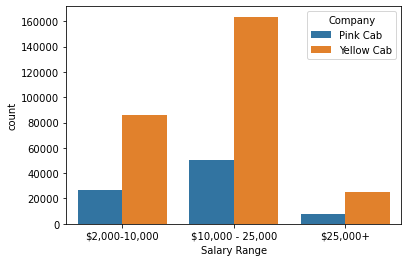

In [40]:
bin_edges = [2000, 10000, 25000, data['Income (USD/Month)'].max()]
bin_labels = ['$2,000-10,000', '$10,000 - 25,000', '$25,000+']
data['Salary Range'] = pd.cut(data['Income (USD/Month)'], bins=bin_edges, labels=bin_labels)
sns.countplot(x='Salary Range', hue='Company', data=data, )

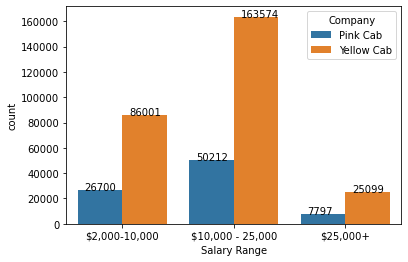

In [41]:
ax = sns.countplot(x='Salary Range', hue='Company', data=data)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.06, p.get_height()+15))

plt.show()

In [43]:
grouped_data = data.groupby(['Income group', 'Company'])['Customer ID'].count().reset_index()
pivot_table = pd.pivot_table(grouped_data, index='Income group', columns='Company', values='Customer ID', aggfunc='sum')
pivot_table['Percentage'] = pivot_table['Yellow Cab'] / (pivot_table['Yellow Cab'] + pivot_table['Pink Cab'])
print(pivot_table)

Company            Pink Cab  Yellow Cab  Percentage
Income group                                       
$2,000 - $10,000      26700       86001     0.76309
$10,000 - $25,000     50212      163574     0.76513
$25,000+               7797       25099     0.76298
